# **GRIP : The Sparks Foundation**
#### Data Science and Business Analytics Internship
#### Author : Anshul Chaurasiya
---
## **Task 4 : Exploratory Data Analysis - Terrorism**
###### This project is analyzing terror activities in various countries and their impact, cause, etc.

In [ ]:
#Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv('/content/terrorism.csv', encoding='latin-1')

In [ ]:
#Calling dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(2909, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Renaming and taking only important data columns**

In [ ]:
#describe our dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.909000e+03,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2909.000000,...,8.900000e+01,1.0,3.400000e+01,0.0,161.000000,115.000000,2908.000000,2908.000000,2908.000000,2908.000000
mean,1.972186e+11,1972.122723,6.138536,15.382606,0.032314,294.377106,5.131317,35.713904,-35.403239,1.088003,...,1.531135e+06,20000.0,2.518029e+06,NaN,2.782609,9.852174,-3.232462,-3.148900,0.527510,-1.452545
std,1.584058e+08,1.585828,3.421309,9.095383,0.176862,208.206269,3.510636,24.617529,53.617887,0.563527,...,6.758437e+06,NaN,7.441265e+06,NaN,1.283042,35.175561,4.454597,4.530162,0.682676,4.129835
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971022e+11,1971.000000,3.000000,7.000000,0.000000,185.000000,1.000000,34.097866,-75.135490,1.000000,...,0.000000e+00,20000.0,2.875000e+04,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
50%,1.972083e+11,1972.000000,6.000000,16.000000,0.000000,217.000000,8.000000,40.697132,-7.312045,1.000000,...,8.000000e+04,20000.0,1.050000e+05,NaN,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.974011e+11,1974.000000,9.000000,23.000000,0.000000,603.000000,8.000000,54.183052,-1.977903,1.000000,...,8.000000e+05,20000.0,1.000000e+06,NaN,4.000000,1.500000,0.000000,0.000000,1.000000,1.000000
max,1.975033e+11,1975.000000,12.000000,31.000000,1.000000,605.000000,12.000000,59.332788,172.636225,5.000000,...,6.100000e+07,20000.0,4.100000e+07,NaN,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'Provstate', 
                   'city':'City', 'attacktype1_txt':'Attacktype', 'target1':'Target', 'nkill':'Nkill', 'nwound':'Nwound', 'summary':'Summary', 
                   'weaptype1_txt':'Weaptype', 'motive':'Motive', 'crit1':'Crit1', 'crit2':'Crit2', 'crit3':'Crit3', 'success':'Success', 'suicide':'Suicide',
                   'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2','natlty3_txt':'Natlty3','gname':'Gname', 
                   'guncertain1': 'Guncertain1', 'claimed':'Claimed'}, inplace=True)

**Keeping only important column**

In [ ]:
data=df[['Year', 'Country', 'Region','Provstate', 'City', 'Crit1', 'Crit2', 'Crit3',
         'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1', 'Gname', 'Guncertain1',
         'Claimed', 'Weaptype','Nkill', 'Nwound', 'Motive']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2909 non-null   int64  
 1   Country      2909 non-null   object 
 2   Region       2909 non-null   object 
 3   Provstate    2899 non-null   object 
 4   City         2909 non-null   object 
 5   Crit1        2909 non-null   int64  
 6   Crit2        2909 non-null   int64  
 7   Crit3        2909 non-null   int64  
 8   Success      2909 non-null   int64  
 9   Suicide      2909 non-null   int64  
 10  Attacktype   2909 non-null   object 
 11  Targtype     2909 non-null   object 
 12  Natlty1      2901 non-null   object 
 13  Gname        2909 non-null   object 
 14  Guncertain1  2909 non-null   int64  
 15  Claimed      725 non-null    float64
 16  Weaptype     2909 non-null   object 
 17  Nkill        2604 non-null   float64
 18  Nwound       1847 non-null   float64
 19  Motive

**Data Analysis**

Data Important Info

In [ ]:
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrrorist attack are', data['Nkill'].max(), 'people that place in', data.loc[data['Nkill'].idxmax()])
print("Year with most attacks:" , data['Year'].value_counts().idxmax())
print("Group with most attacks:", data['Gname'].value_counts().index[1]) #as most of the attack was done by unknown we are taking the next group name
print("Most Attack Types:", data['Attacktype'].value_counts().idxmax())

Country with the highest number of Terrorist Attacks: United States
Regions with the highest number of Terrorist Attacks: Western Europe
Maximum number of people were killed by a single terrrorist attack are 88.0 people that place in Year                                                        1974
Country                                                   Greece
Region                                            Western Europe
Provstate                                                 Attica
City                                                      Athens
Crit1                                                          1
Crit2                                                          1
Crit3                                                          1
Success                                                        1
Suicide                                                        0
Attacktype                                     Bombing/Explosion
Targtype                                     Airpor

**Let see the word cloud of states where terrrorist attacked**

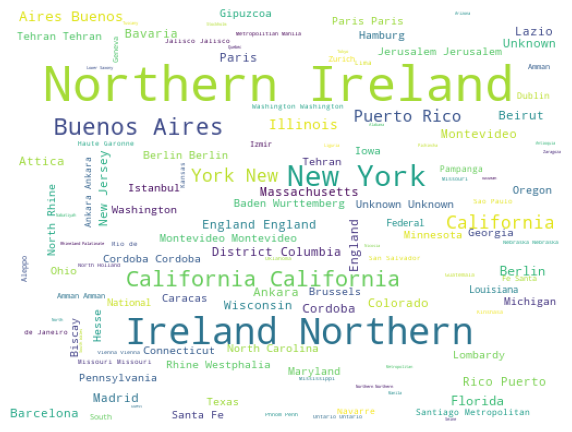

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities= data.Provstate.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width= 512, height= 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Data analysis of Global Terrorism from 1970 to 2017**

In [ ]:
data['Year'].value_counts(dropna=False).sort_index()

1970    651
1971    471
1972    568
1973    473
1974    581
1975    165
Name: Year, dtype: int64

**Data Visualization**

Number of Attacks each year from 1970 to 2017

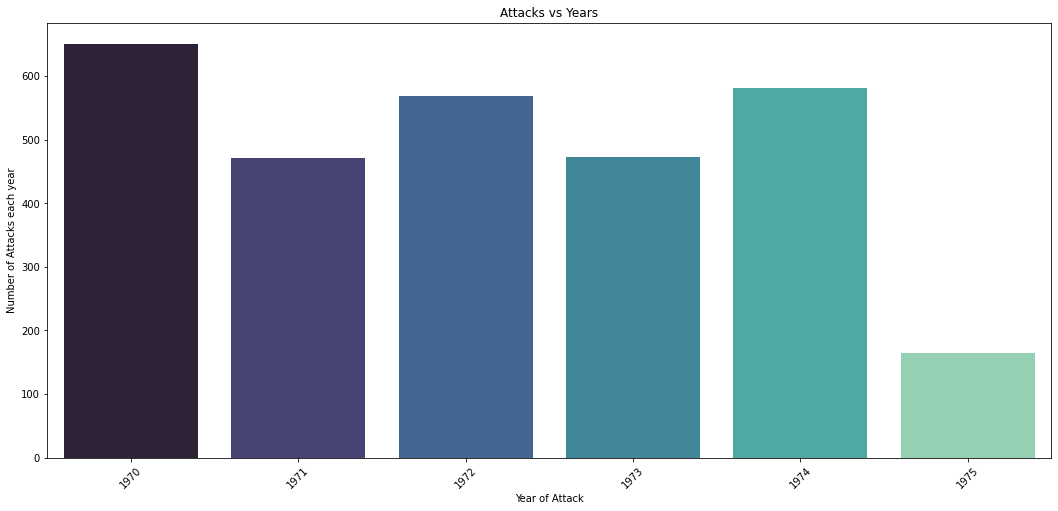

In [ ]:
x_year = data['Year'].unique()
y_count_years= data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,8))
sns.barplot(x= x_year, y= y_count_years, palette= 'mako')
plt.xticks(rotation=45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks vs Years')
plt.show()

**Terrorist activities by Region in each Year through Area Plot**

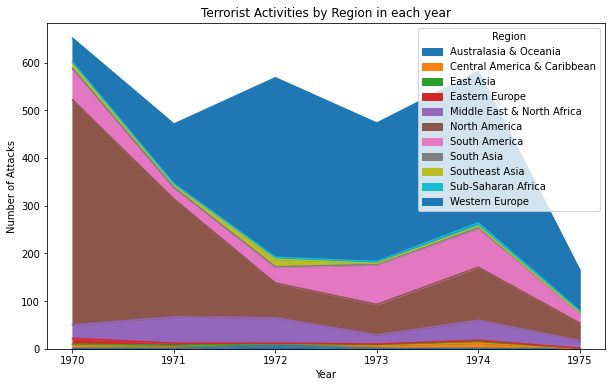

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area', figsize=(10,6))
plt.title('Terrorist Activities by Region in each year')
plt.ylabel('Number of Attacks')
plt.show()

**Taking Nulldata to zero and combining kill and wound as a Damage**

In [ ]:
data['Nwound']=data['Nwound'].fillna(0).astype(int)
data['Nkill']=data['Nkill'].fillna(0).astype(int)
data['Damage']=data['Nkill']+data['Nwound']

In [ ]:
data['Damage']

0       1
1       0
2       1
3       0
4       0
       ..
2904    0
2905    0
2906    0
2907    0
2908    0
Name: Damage, Length: 2909, dtype: int64

**Top worst Terror Attacks in History from 1970 to 2017**

In [ ]:
terror1=data.sort_values(by='Damage', ascending=False)[:40]

In [ ]:
heat=terror1.pivot_table(index='Country', columns='Year', values='Damage')
heat.fillna(0, inplace=True)
heat.head(10)

Year,1970,1971,1972,1973,1974,1975
Country,,,,,,
Czechoslovakia,0.0,0.0,26.0,0.0,0.000000,0.0
France,0.0,0.0,0.0,23.0,36.000000,0.0
Greece,0.0,0.0,0.0,60.0,88.000000,0.0
Ireland,0.0,0.0,0.0,0.0,26.000000,0.0
Israel,0.0,0.0,98.0,20.0,57.333333,0.0
Italy,0.0,0.0,0.0,55.5,85.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.000000,127.0
Pakistan,24.0,0.0,0.0,0.0,0.000000,0.0
Philippines,36.0,0.0,0.0,0.0,0.000000,0.0


**Analyzing the type of Attack**

In [ ]:
print(data['Attacktype'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [ ]:
data['Attacktype'].value_counts()

Bombing/Explosion                      1293
Assassination                           711
Facility/Infrastructure Attack          370
Armed Assault                           293
Hostage Taking (Kidnapping)             157
Hijacking                                41
Hostage Taking (Barricade Incident)      22
Unknown                                  12
Unarmed Assault                          10
Name: Attacktype, dtype: int64

In [ ]:
atk_filtered=data['Attacktype'].apply(lambda x: x if x in['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (kidnapping)', 'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

In [ ]:
atk_filtered.unique()

array(['Assassination', 'Others', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault'], dtype=object)

In [ ]:
atk_filtered.value_counts()

Bombing/Explosion                 1293
Assassination                      711
Facility/Infrastructure Attack     370
Armed Assault                      293
Others                             242
Name: Attacktype, dtype: int64

In [ ]:
attack_type

[1293, 711, 370, 293, 242]

**Analyzing the Weapon Type**

In [ ]:
print(data['Weaptype'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological']


In [ ]:
data['Weaptype'].value_counts()

Explosives                                                                     1415
Firearms                                                                        870
Incendiary                                                                      399
Unknown                                                                         186
Melee                                                                            22
Chemical                                                                         12
Fake Weapons                                                                      2
Sabotage Equipment                                                                1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Radiological                                                                      1
Name: Weaptype, dtype: int64

In [ ]:
weaptype_filtered = data['Weaptype'].apply(lambda x: x if x in ['Explosives', 'Firearms', 'Unknown', 'Incendiary'] else 'Others')
weaptype=weaptype_filtered.value_counts().tolist()

In [ ]:
weaptype_filtered.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Others'],
      dtype=object)

In [ ]:
weaptype_filtered.value_counts()

Explosives    1415
Firearms       870
Incendiary     399
Unknown        186
Others          39
Name: Weaptype, dtype: int64

In [ ]:
weaptype

[1415, 870, 399, 186, 39]

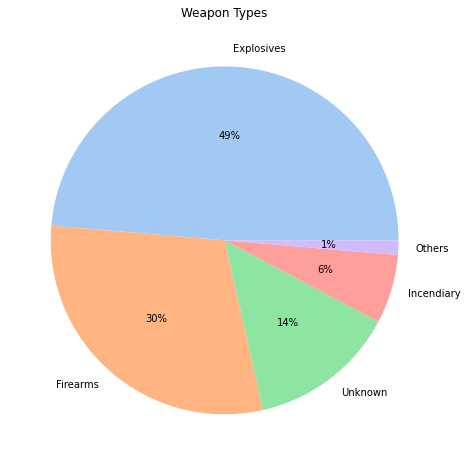

In [ ]:
weap_labels=['Explosives', 'Firearms', 'Unknown','Incendiary', 'Others']
colors=sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(16, 8))
plt.title('Weapon Types')
plt.pie(weaptype, labels= weap_labels, colors = colors, autopct='%.0f%%')
plt.show()

**Most Attacked Countries**

In [ ]:
data.Country.value_counts()[:15]

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Jordan                 22
Name: Country, dtype: int64

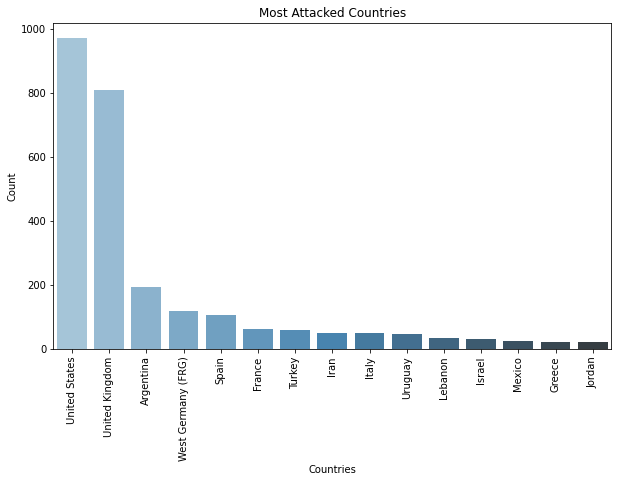

In [ ]:
plt.subplots(figsize=(10, 6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values, palette='Blues_d')
plt.title('Most Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Most Targeted Countries**

In [ ]:
data.Natlty1.value_counts()[:15]

United States       1221
Northern Ireland     520
Great Britain        296
Israel               119
Spain                109
Germany              107
Argentina             96
France                35
Iran                  34
Uruguay               25
Turkey                22
Italy                 20
Jordan                19
Soviet Union          18
Puerto Rico           17
Name: Natlty1, dtype: int64

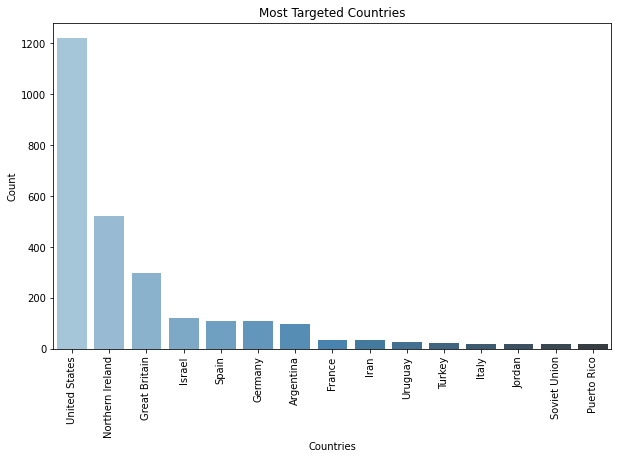

In [ ]:
plt.subplots(figsize=(10, 6))
sns.barplot(data['Natlty1'].value_counts()[:15].index,data['Natlty1'].value_counts()[:15].values, palette='Blues_d')
plt.title('Most Targeted Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Analyzing the people killed in Terror Attack**

In [ ]:
#total number of people killed
killData=data.loc[:,'Nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna()))) #drop the NaN Values

Number of people killed by terror attack: 1927


**Peopke killed with respect to Attack Typ**e

In [ ]:
attackData= data.loc[:, 'Attacktype']
typeKillData= pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillData.head()

,Attacktype,Nkill
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


**Number of people killed in different type of Attack**

In [ ]:
typeKillFormatData=typeKillData.pivot_table(columns='Attacktype', values='Nkill', aggfunc='sum')
typeKillFormatData

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Nkill,191,661,865,11,41,91,50,1,16


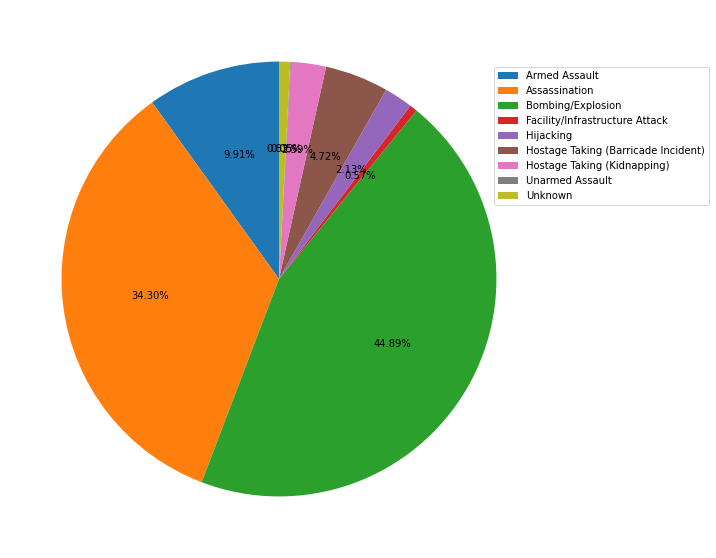

In [ ]:
labels= typeKillFormatData.columns.tolist() #convert line to list
transpose= typeKillFormatData.T #Transpose
values=transpose.values.tolist()
fig, ax= plt.subplots(figsize=(18,10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=10) #location legend
plt.show()

**People killed with respect to Countries**

In [ ]:
countryData=data.loc[:,'Country']
countryKillData=pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData= countryKillData.pivot_table(columns='Country', values='Nkill', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bolivia,Botswana,Brazil,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Nkill,0,0,0,54,1,4,0,0,1,2,...,1,981,131,4,0,1,33,1,0,4


**Conclusion**

Terrorist mostly uses Bombing/Explosion to attack.

Terrorist mostly uses Explosives as weapon.

Iraq, Pakistan, Afghanistan, India, volumbia these are top 5 countries with most terrorist attacks.

similarly above 5 coutries are the most targeted countries.

Terrorist killed people mainly with Armed Assault and Bombing/Explosion.

People killed in Iraq and Afghanistan Terrorist Attack are very high as comapared to other countries.